Accuracy:  0.8866666666666667
              precision    recall  f1-score   support

       False       0.90      0.99      0.94       135
        True       0.00      0.00      0.00        15

    accuracy                           0.89       150
   macro avg       0.45      0.49      0.47       150
weighted avg       0.81      0.89      0.85       150



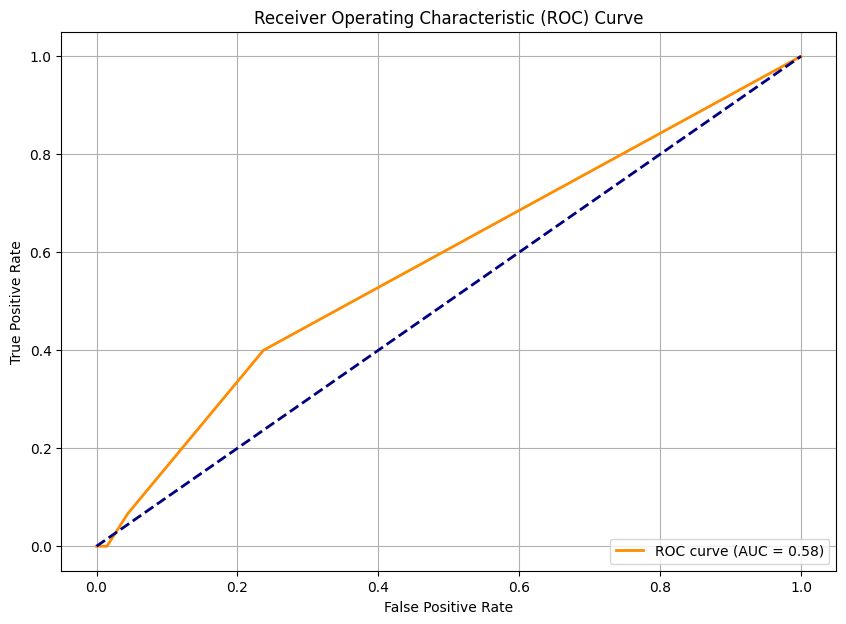

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

data = pd.read_csv('./cm1.csv')

# Remove empty values
data = data.dropna()
data = data.reset_index()

# Split the data into features and target
X = data.drop("defects", axis=1)
y = data["defects"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifiers
clf = KNeighborsClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Test the classifier
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Predict probabilities of the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Get the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Get the AUC value
roc_auc = auc(fpr, tpr)

#Save AUC values
df = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'AUC': roc_auc
})

df.to_csv('./AUC_Extracts/CM1/CM1_KNN_NONE.csv', index=False)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
